In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import fisher_exact
from scipy.stats import pointbiserialr
from scipy.stats import ttest_ind

In [2]:
path = "C:/All/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(path, sep=',')

<h1>DATA UNDERSTANDING<h1>

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [29]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<Axes: title={'center': 'account length'}>,
        <Axes: title={'center': 'number vmail messages'}>,
        <Axes: title={'center': 'total day minutes'}>,
        <Axes: title={'center': 'total day calls'}>],
       [<Axes: title={'center': 'total day charge'}>,
        <Axes: title={'center': 'total eve minutes'}>,
        <Axes: title={'center': 'total eve calls'}>,
        <Axes: title={'center': 'total eve charge'}>],
       [<Axes: title={'center': 'total night minutes'}>,
        <Axes: title={'center': 'total night calls'}>,
        <Axes: title={'center': 'total night charge'}>,
        <Axes: title={'center': 'total intl minutes'}>],
       [<Axes: title={'center': 'total intl calls'}>,
        <Axes: title={'center': 'total intl charge'}>,
        <Axes: title={'center': 'customer service calls'}>, <Axes: >]],
      dtype=object)

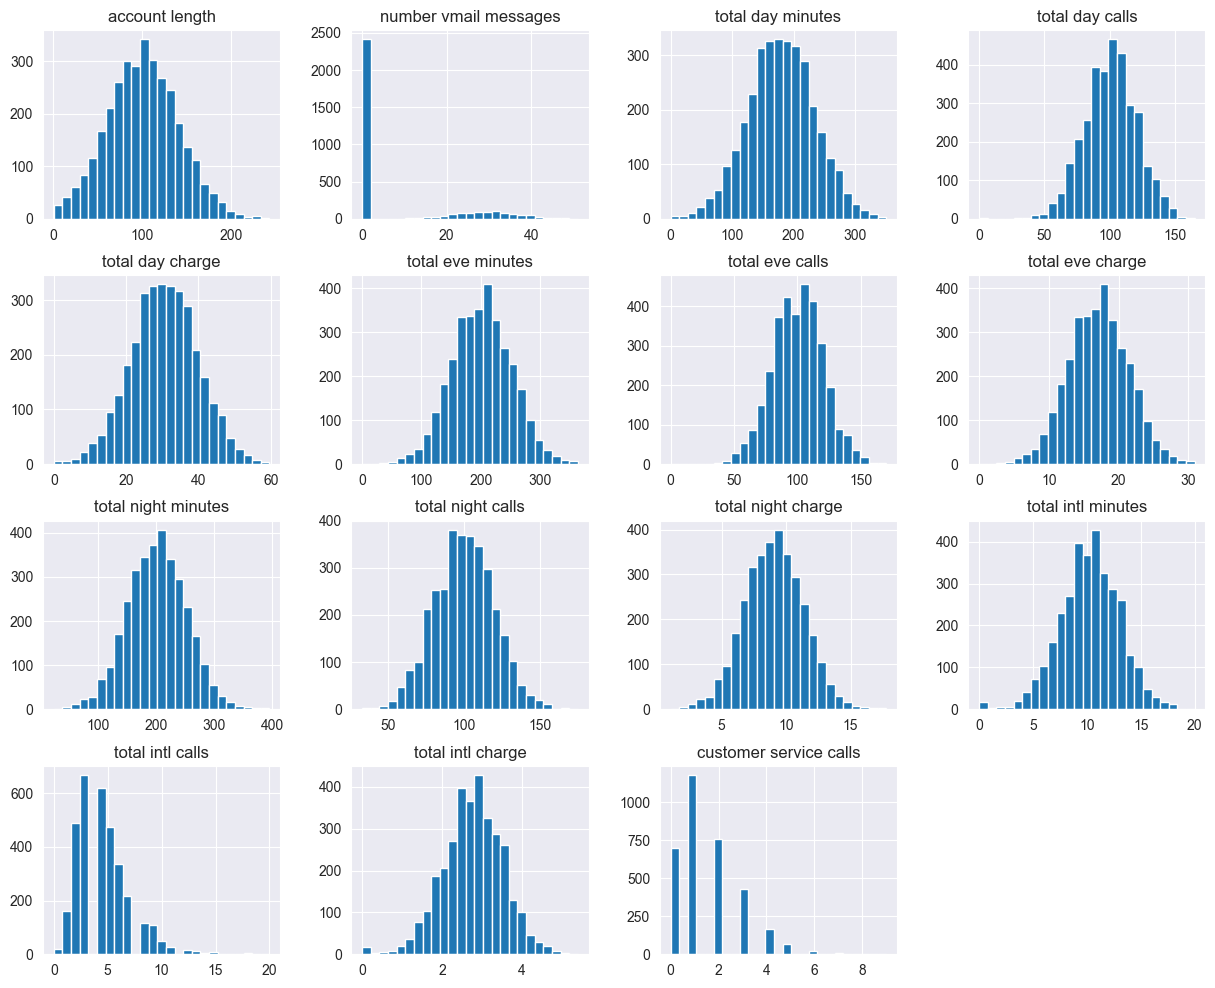

In [9]:
df.drop(columns = ['area code']).hist(figsize=(15, 12), bins=25)

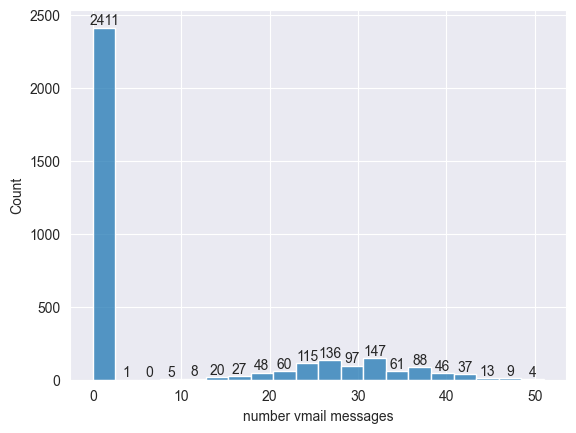

In [10]:
ax = sns.histplot(data=df, x="number vmail messages")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

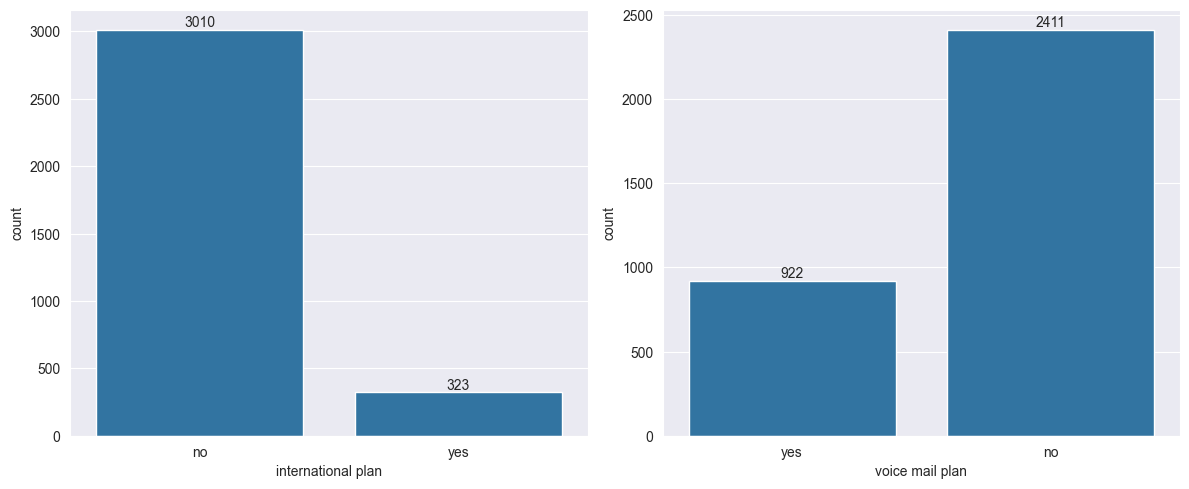

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца

sns.countplot(x="international plan", data=df, ax=axes[0])
sns.countplot(x="voice mail plan", data=df, ax=axes[1])

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [13]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [14]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

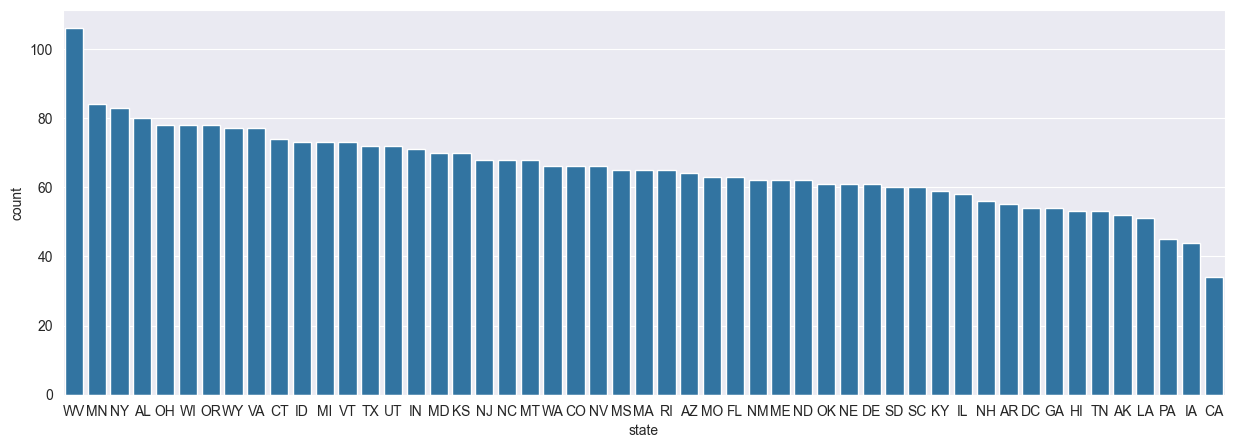

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.show()

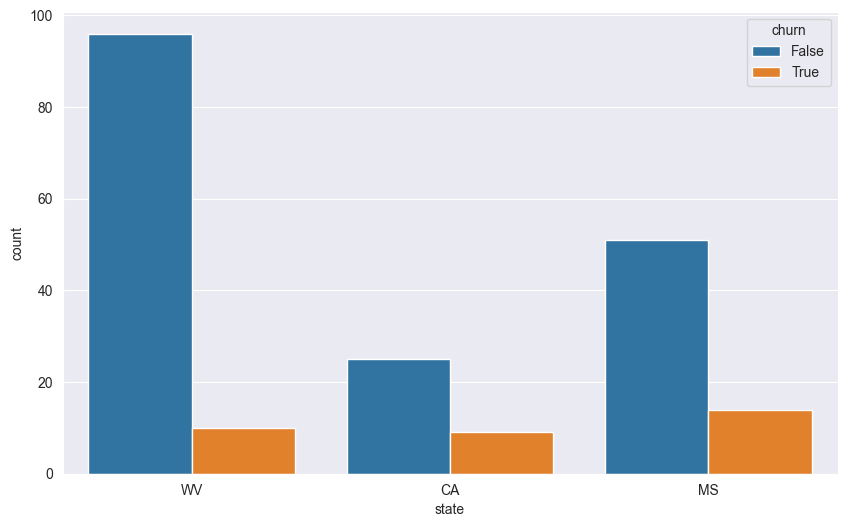

In [17]:
states_to_show = ['WV', 'MS', 'CA']
filtered_df = df[df['state'].isin(states_to_show)]

plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='churn', data=filtered_df)
plt.show()

<Axes: xlabel='voice mail plan', ylabel='count'>

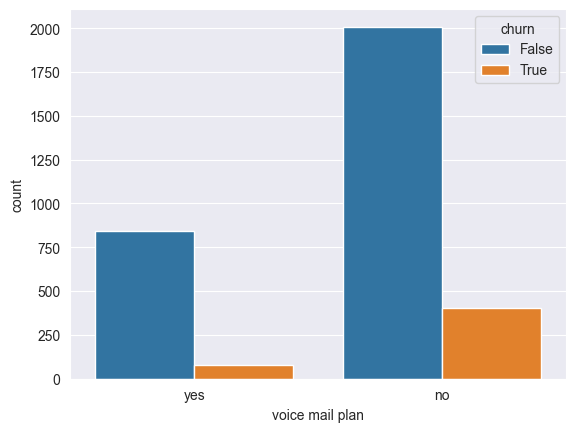

In [18]:
sns.countplot(x='voice mail plan', hue='churn', data=df)

<h1>Data cleaning & Analyzing relationships<h1>

In [19]:
df['state'] = df['state'].astype('string')

In [20]:
df = df.drop(columns=['phone number'])

In [21]:
columns_to_fix = df[['international plan', 'voice mail plan']]

for column in columns_to_fix:
    df[column] = df[column].map({'yes': True, 'no': False})

<h4>Яким є розподіл абонентів за цільовою ознакою churn? Назвіть відсоток лояльних абонентів.<h4>

In [22]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [23]:
df['churn'].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

<h4>Жителі якого штату розмовляють телефоном найбільше? менше всього? Зверніть увагу, що нас цікавлять усі види дзвінків.<h4>

In [31]:
df['total minutes'] = (
    df['total day minutes'] +
    df['total eve minutes'] +
    df['total night minutes'] +
    df['total intl minutes']
)
state_minutes = df.groupby('state')['total minutes'].sum()
max_state = state_minutes.idxmax(), state_minutes.max()
min_state = state_minutes.idxmin(), state_minutes.min()
print(max_state)
print(min_state)

('WV', np.float64(60789.7))
('CA', np.float64(20091.0))


In [32]:
df = df.drop(columns = ['total minutes'])

<h4>Чи вірно, що люди, які здійснюють багато міжнародних дзвінків, набувають international plan? Не забувайте про візуалізацію інформації.<h4>

In [33]:
df.groupby('international plan')['total intl minutes'].mean()

international plan
False    10.195349
True     10.628173
Name: total intl minutes, dtype: float64

<Axes: xlabel='international plan', ylabel='total intl minutes'>

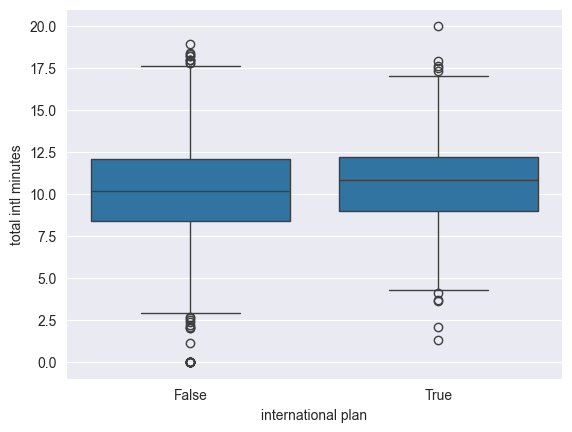

In [34]:
sns.boxplot(x='international plan', y='total intl minutes', data=df)

In [35]:
df_tmp = df[['total intl minutes', 'international plan']].dropna()
print(pointbiserialr(df_tmp['total intl minutes'], df_tmp['international plan']))

SignificanceResult(statistic=np.float64(0.045870742946062686), pvalue=np.float64(0.008082187929448996))


<h4>Як пов'язані наявність голосової пошти та міжнародного плану з лояльністю абонентів? Перевірте статистичну значущість цих зв'язків<h4>

In [36]:
print(pd.crosstab(df['voice mail plan'], df['churn'], normalize='index'))
print('\n')
print(pd.crosstab(df['international plan'], df['churn'], normalize='index'))

churn               False     True 
voice mail plan                    
False            0.832849  0.167151
True             0.913232  0.086768


churn                  False     True 
international plan                    
False               0.885050  0.114950
True                0.575851  0.424149


In [37]:
df_tmp = df[['voice mail plan','international plan', 'churn']]
df_tmp.corr()

,voice mail plan,international plan,churn
voice mail plan,1.000000,0.006006,-0.102148
international plan,0.006006,1.000000,0.259852
churn,-0.102148,0.259852,1.000000


In [38]:
corr, p_value = spearmanr(df['churn'], df['voice mail plan'])
print(corr, p_value)

-0.10214814067014692 3.4110371159458437e-09


In [39]:
corr, p_value = spearmanr(df['churn'], df['international plan'])
print(corr, p_value)

0.25985184734548217 1.4336058008647194e-52


<h4>Що можна сказати про взаємозв'язок кількості звернень до кол-центру та лояльності? Не забувайте про візуалізацію інформації.<h4>

In [40]:
df.groupby('churn')['customer service calls'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
False,2850.0,1.449825,1.163883,0.0,1.0,1.0,2.0,8.0
True,483.0,2.229814,1.853275,0.0,1.0,2.0,4.0,9.0


<Axes: xlabel='churn', ylabel='customer service calls'>

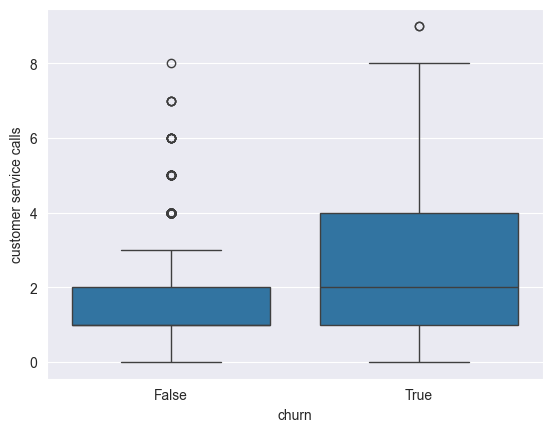

In [41]:
sns.boxplot(x='churn', y='customer service calls', data=df)

In [42]:
corr, p_value = pearsonr(df['churn'], df['customer service calls'])
print(corr, p_value)

0.2087499987837946 3.900360240187257e-34


In [43]:
loyal = df[df['churn'] == False]['customer service calls']
churned = df[df['churn'] == True]['customer service calls']

t_stat, p_value = ttest_ind(loyal, churned, equal_var=False)

print("t-statistic =", t_stat)
print("p-value =", p_value)

t-statistic = -8.95514138244338
p-value = 5.270040385717215e-18


<h4>Які з числових ознак мають найбільший рівень кореляції? Чому?<h4>

In [44]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns
df_num = df[num_cols]
corr_matrix = df_num.corr()

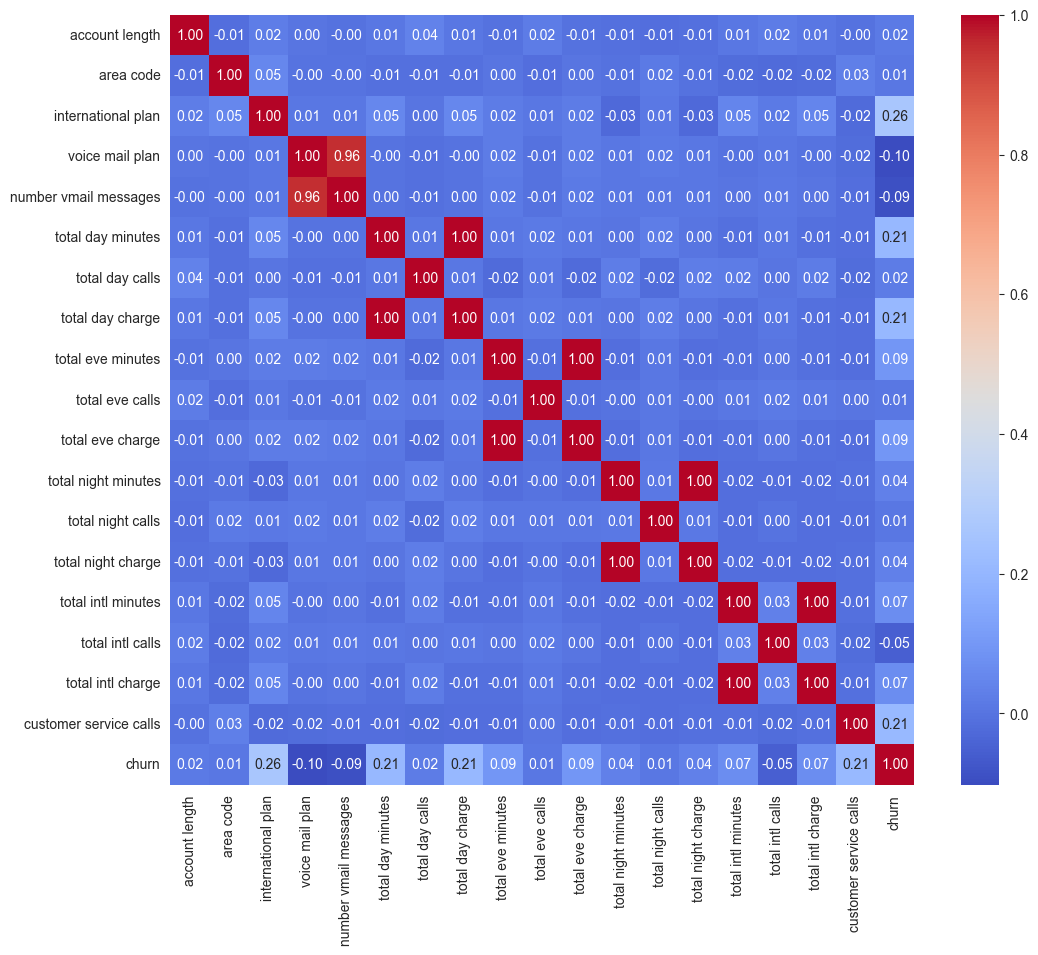

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [46]:
corr_matrix_abs = corr_matrix.abs()

np.fill_diagonal(corr_matrix_abs.values, 0)
max_corr = corr_matrix_abs.max().max()
max_pair = np.where(corr_matrix_abs == max_corr)
feature1 = corr_matrix_abs.index[max_pair[0][0]]
feature2 = corr_matrix_abs.columns[max_pair[1][0]]

print(feature1)
print(feature2)
print(max_corr)

total day minutes
total day charge
0.9999999521904007


<h4>Чи пов'язаний час користування обліковим записом із кількістю звернень до кол-центру?<h4>

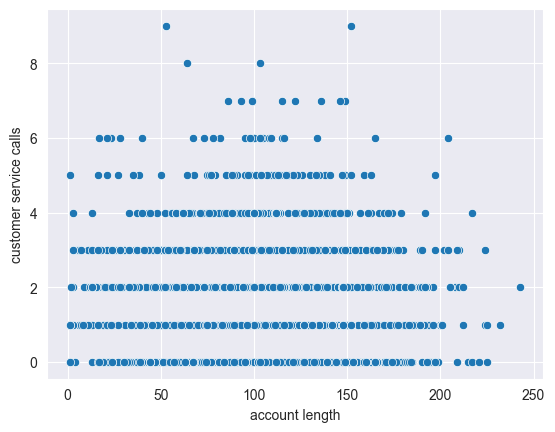

In [47]:
sns.scatterplot(x='account length', y='customer service calls', data=df)
plt.show()

In [48]:
df[['account length', 'customer service calls']].corr()

,account length,customer service calls
account length,1.000000,-0.003796
customer service calls,-0.003796,1.000000


In [49]:
corr, p_value = spearmanr(df['account length'], df['customer service calls'])
print(corr, p_value)

-0.005941876696982856 0.7316649567390638


<h1>ТВОРЧЕ ЗАВДАННЯ</h1>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   string 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   bool   
 4   voice mail plan         3333 non-null   bool   
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [51]:
df[['churn', 'customer service calls']].corr()

,churn,customer service calls
churn,1.00000,0.20875
customer service calls,0.20875,1.00000


In [52]:
corr, p_value = spearmanr(df['churn'], df['customer service calls'])
print(corr, p_value)

0.13665664980779227 2.305085359848066e-15


In [53]:
corr, p_value = kendalltau(df['churn'], df['customer service calls'])
print(corr, p_value)

0.12363343129987882 3.0633747803607392e-15


<Axes: xlabel='churn', ylabel='customer service calls'>

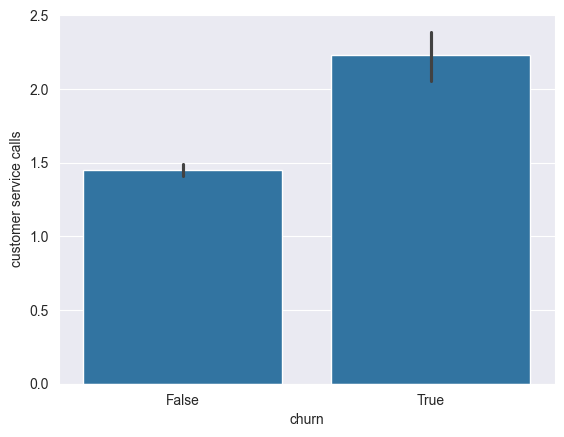

In [65]:
sns.barplot(data = df, x = 'churn', y = 'customer service calls')

In [54]:
for col in df.columns:
    if "total" in col.lower():
        corr, p_value = spearmanr(df["churn"], df[col])
        print(f"{col}: corr = {corr:.4f}, p_value = {p_value:.10f}")

total day minutes: corr = 0.1707, p_value = 0.0000000000
total day calls: corr = 0.0263, p_value = 0.1288408365
total day charge: corr = 0.1707, p_value = 0.0000000000
total eve minutes: corr = 0.0886, p_value = 0.0000003011
total eve calls: corr = 0.0086, p_value = 0.6205535359
total eve charge: corr = 0.0886, p_value = 0.0000003022
total night minutes: corr = 0.0343, p_value = 0.0474219966
total night calls: corr = 0.0047, p_value = 0.7864613257
total night charge: corr = 0.0344, p_value = 0.0473531183
total intl minutes: corr = 0.0609, p_value = 0.0004398188
total intl calls: corr = -0.0748, p_value = 0.0000155754
total intl charge: corr = 0.0609, p_value = 0.0004398188


In [55]:
df_tmp = pd.crosstab(df['churn'], df['international plan']).values
a = df_tmp[0,0]
b = df_tmp[0,1]
c = df_tmp[1,0]
d = df_tmp[1,1]

association_coef = (a*d - b*c) / (a*d + b*c)
contingency_coef = (a*d - b*c) / np.sqrt(a+b) / np.sqrt(b+d) / np.sqrt(d+c) / np.sqrt(a+c)
print(association_coef, contingency_coef)
print(fisher_exact(df_tmp))

0.7001984515191324 0.25985184734548217
SignificanceResult(statistic=np.float64(5.671079619615886), pvalue=np.float64(6.28598931370855e-39))


In [56]:
df_tmp = pd.crosstab(df['churn'], df['voice mail plan']).values
a = df_tmp[0,0]
b = df_tmp[0,1]
c = df_tmp[1,0]
d = df_tmp[1,1]

association_coef = (a*d - b*c) / (a*d + b*c)
contingency_coef = (a*d - b*c) / np.sqrt(a+b) / np.sqrt(b+d) / np.sqrt(d+c) / np.sqrt(a+c)
print(association_coef, contingency_coef)
print(fisher_exact(df_tmp))

-0.35739630294860053 -0.10214814067014692
SignificanceResult(statistic=np.float64(0.4734090520620288), pvalue=np.float64(1.141385384134011e-09))


In [57]:
df_tmp = df[['churn', 'account length']].dropna()
print(pointbiserialr(df_tmp['churn'], df_tmp['account length']))

SignificanceResult(statistic=np.float64(0.01654074224367413), pvalue=np.float64(0.3397600070563793))


In [58]:
df_tmp = df[['churn', 'area code']].dropna()
print(pointbiserialr(df_tmp['churn'], df_tmp['area code']))

SignificanceResult(statistic=np.float64(0.006174233160678325), pvalue=np.float64(0.7215998968012044))


In [93]:
df_tmp = pd.crosstab(df['churn'], df['area code'])
print(df_tmp)

area code  408   415  510
churn                    
False      716  1419  715
True       122   236  125


<Axes: xlabel='area code', ylabel='churn'>

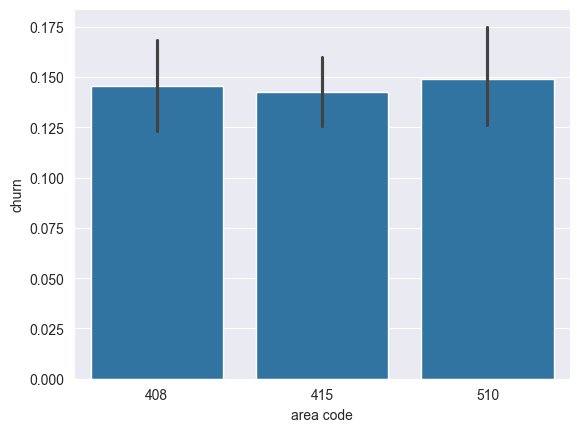

In [92]:
sns.barplot(data = df, y = 'churn', x = 'area code')

In [59]:
loyal = df[df['state'] == 'WV']['churn']
churned = df[df['state'] == 'CA']['churn']

t_stat, p_value = ttest_ind(loyal, churned, equal_var=False)

print("t-statistic =", t_stat)
print("p-value =", p_value)

t-statistic = -2.0795259210526895
p-value = 0.04364081961808944


In [60]:
df_tmp = pd.crosstab(df['state'], df['churn']).values
print(fisher_exact(df_tmp))

SignificanceResult(statistic=np.float64(9.945099353815805e-60), pvalue=np.float64(0.0027))
